# Tache 7

Ludovic Delferiere 81232000

# Initialisation de la structure (BaF2) et import

In [14]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure.core import Spin

import numpy as np
import matplotlib.pyplot as plt
with MPRester("hWWmIDodjhkgKVHj88m318vKs3nGtcQp") as m:
    band = m.get_bandstructure_by_material_id("mp-1029")

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Caractéristiques de la bande interdite

In [15]:
gap = band.get_band_gap()

if gap['direct']==True:
    direct = "directe"
else:
    direct="indirecte"
print("La largeur de la bande interdite est de " + str(gap["energy"])+ " eV")
print("Pour ce matériau, la bande interdite est : " + str(direct))
print("Direction du vecteur de transition : " + str(gap["transition"]))

La largeur de la bande interdite est de 6.6029 eV
Pour ce matériau, la bande interdite est : indirecte
Direction du vecteur de transition : (0.222,0.222,0.443)-\Gamma


On a une épaisseur de la bande interdite qui vaut 6.6029 eV, il s'agit de la distance entre le maximum de la bande de valence et le minimum de la bande de conduction. Ce matériau a une bande interdite qui est indirecte. Dans un tel matériau, le minimum de la bande de conduction et le maximum de la bande de valence ne se trouvent pas au même vecteur d'onde. Pour qu'un électron passe d'une bande à l'autre, il doit gagner (ou perdre) de l'énergie mais il doit aussi changer de vecteur d'onde. Ce qui implique l'intervention d'un phonon (quantum de vibration du réseau cristallin) pour conserver la quantité de mouvement. Cette obigation rend les transitions moins probables. On doit changer de k pour avoir le saut d'électrons de la BC à la BV. Comme la largeur de la bande interdite est supérieure à 2 eV, on en déduit qu'il s'agit d'un matériau isolant.

# Visualisation de celle-ci

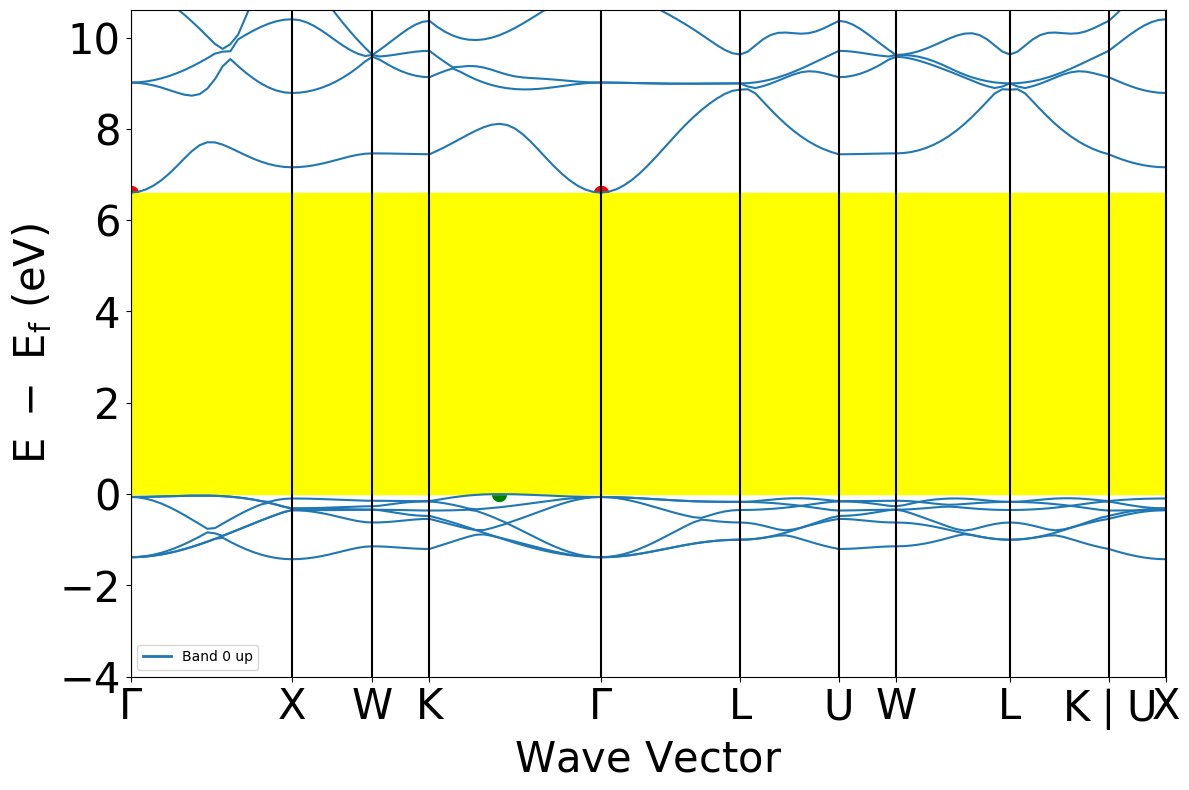

In [16]:
bs = BSPlotter(band)
data = bs.bs_plot_data()
energy = gap.get('energy')
distance = data.get('ticks').get('distance')

bs.get_plot(vbm_cbm_marker=True)
plt.fill_between(np.linspace(distance[0], distance[-1], 2), 0, energy, color = "yellow")
plot_data = bs.bs_plot_data()
data = plot_data['ticks']['distance']



# Caractéristiques des bandes de conduction et de valence

In [17]:
#Récupération des données sur les bandes de valence et conduction
data = bs.bs_plot_data()

#vbm = bande de valance et cbm= bande de conduction
vbm = band.get_vbm()
cbm = band.get_cbm()
index_cond = band.get_cbm()['band_index'][Spin.up][0]
index_val = band.get_vbm()['band_index'][Spin.up][0]
print("La dernière bande de valence est : "+str(index_val))
print("Energie de celle-ci : "+str(vbm.get('energy')) + "eV" )
print("\n")
print("La première bande de conduction est : "+ str(index_cond))
print("Energie de celle-ci : "+str(cbm.get('energy')) + "eV" )
print("\n")
print("La bande interdite est la différence entre les deux, soit :" +str((cbm.get('energy')-(vbm.get('energy')))) + ' eV')

La dernière bande de valence est : 11
Energie de celle-ci : -2.2201eV


La première bande de conduction est : 12
Energie de celle-ci : 4.3828eV


La bande interdite est la différence entre les deux, soit :6.6029 eV


# Visualisation des directions de plus grandes et plus petites dispersions

Sur une bande électronique, la dispersion représente la variation de l'énergie des électrons en fonction de leur vecteur d'onde. Et donc, la direction dans une zone de Brillouin où la pente est maximale représente un maximum de dispersion sur une bande. 

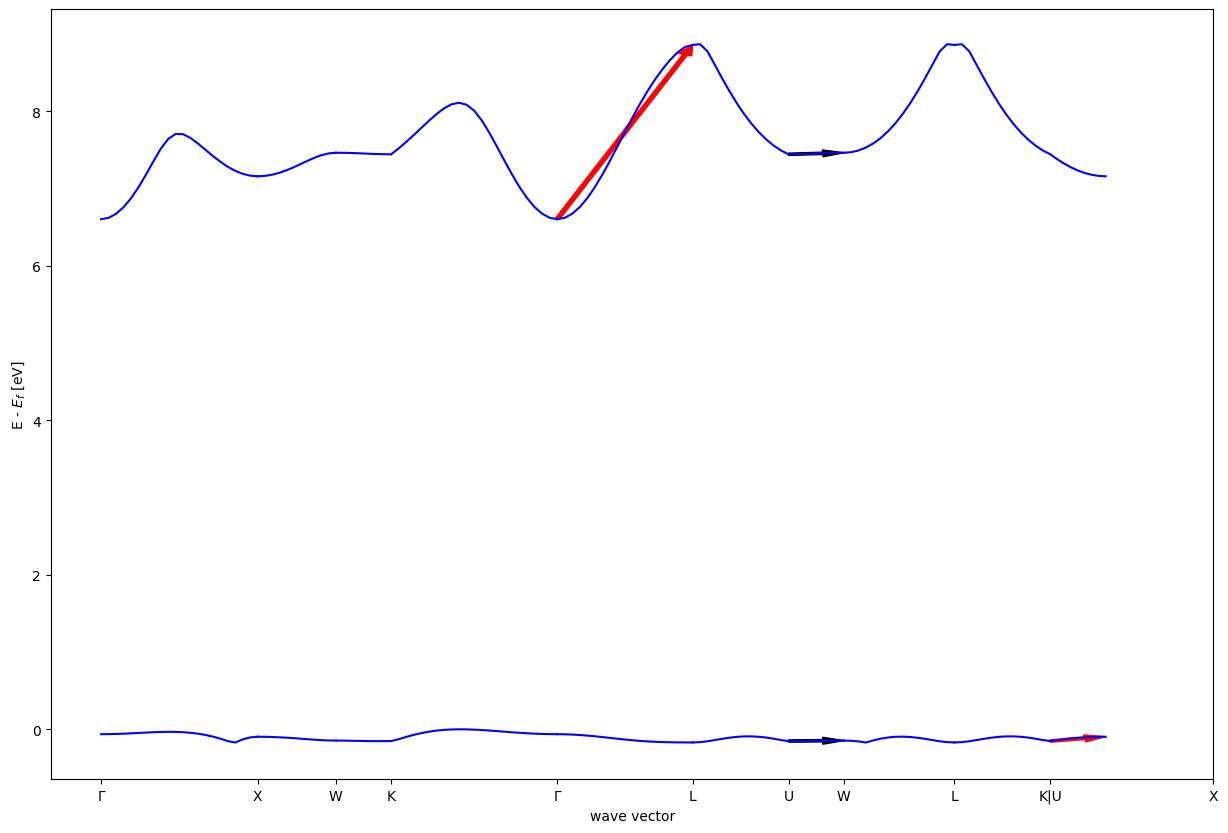

In [18]:

distance = data.get('distances')
energy = data.get('energy')

def slope(x,y):
    slope = abs(y[-1]-y[0])/(x[-1]-x[0])
    return np.array([slope,x[0],y[0],x[-1]-x[0],y[-1]-y[0]])

slope_val = np.zeros((len(distance), 5))
slope_con = np.zeros((len(distance), 5))

for i in range(len(distance)):
    slope_val[i] = slope(distance[i], energy["1"][i][11])
    slope_con[i] = slope(distance[i], energy["1"][i][12])

val_slopes = slope_val.T
con_slopes = slope_con.T

max_val = np.argmax(val_slopes[0])
min_val = np.argmin(val_slopes[0])
max_con = np.argmax(con_slopes[0]) 
min_con = np.argmin(con_slopes[0])

figure,axes = plt.subplots(1,1,figsize=(15,10))

for i in range(len(distance)):
    plt.plot(distance[i],energy['1'][i][11],'b')
    plt.plot(distance[i],energy['1'][i][12],'b')
for i in range(len(data.get("vbm"))):
    x, y= data.get("vbm")[i]
    plt.plot(x,y,markersize=10)
for i in range(len(data.get("cbm"))):
    x, y = data.get("cbm")[i]
    plt.plot(x,y,markersize=10)
dts=[]    
for i in range(len(distance)):
    dts.append(distance[i][0])
dts.append(7.10830014)
plt.arrow(val_slopes[1][max_val], val_slopes[2][max_val], val_slopes[3][max_val], val_slopes[4][max_val], color='red', width=0.030, length_includes_head=True)
plt.arrow(val_slopes[1][min_val], val_slopes[2][min_val], val_slopes[3][min_val], val_slopes[4][min_val], color='black', width=0.030, length_includes_head=True)
plt.arrow(con_slopes[1][max_con], con_slopes[2][max_con], con_slopes[3][max_con], con_slopes[4][max_con], color='red', width=0.030, length_includes_head=True)
plt.arrow(con_slopes[1][min_con], con_slopes[2][min_con], con_slopes[3][min_con], con_slopes[4][min_con], color='black', width=0.030, length_includes_head=True)

axes.set_xticks(dts)
axes.set_xticklabels(['Γ','X',"W",'K','Γ',"L",'U','W',"L",'K|U','X'])
axes.set_xlabel("wave vector")
axes.set_ylabel("E - $E_{f}$ [eV]")

plt.show()

# Calcul de la masse effective

La masse effective permet de représenter le comportement d'un électron dans un potentiel. Pour un électron libre, la dispersion électronique est une parabole. Le concept de masse effective se modélise comme la réponse de l'électron dans un potentiel en variant sa masse. Il s'agit d'un modèle abstrait car l'électron conserve toujours une masse de 9,109.e-31. On remarque que la masse effective d'un électron dans le vide est égale à la masse réelle de l'électron. 
On peut calculer la masse effective comme l'inverse de la dérivée seconde de l'énergie par rapport au vecteur d'onde k (corrigé par quelques facteurs pour correspondre aux bonnes unités). On l'exprime en kg. Cette equation peut s'interpréter comme la réponse de l'électron en accélération lorqu'il est soumis à une force de potentiel.

In [19]:
h = 6.62607015e-34 
eV = 1.6022e-19
h_bar = h/(2*np.pi)
k_cond = band.get_cbm()['kpoint'].frac_coords*1e10
k_val = band.get_vbm()['kpoint'].frac_coords*1e10
E_cond = band.get_cbm()['energy']
E_val = band.get_vbm()['energy']
masse_cond = (h_bar**2 * (k_cond[0]**2+k_cond[1]**2+k_cond[2]**2))/(2*E_cond*eV)
print('Masse effective à la base de la première bande de conduction ' + str(masse_cond)+' kg\n')
masse_val = (h_bar**2 * (k_val[0]**2+k_val[1]**2+k_val[2]**2))/(2*abs(E_val)*eV)
print('Masse effective au sommet de la dernière bande de valence vaut ' + str(masse_val)+' kg\n')

Masse effective à la base de la première bande de conduction 0.0 kg

Masse effective au sommet de la dernière bande de valence vaut 4.605620978271442e-31 kg



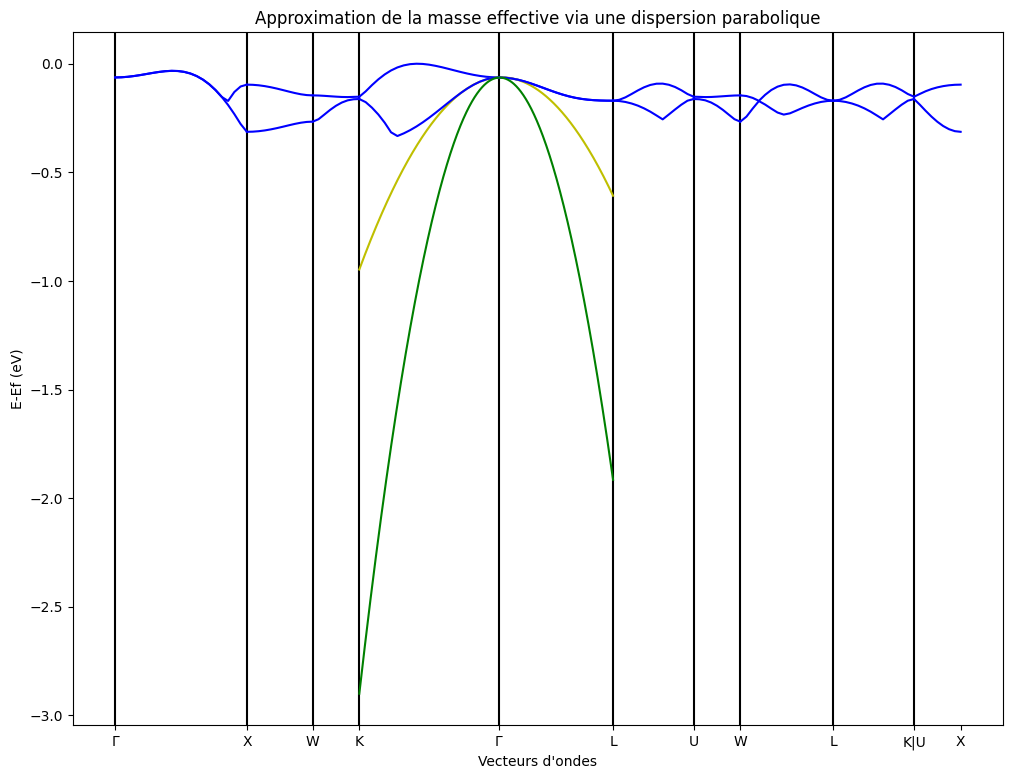

Bande de valence : 
Parabole approximant la dernière bande de valence à son sommet : 
       y(k) = -2.4979449761282178k² + 14.584326887464151k -21.3515988574547
Dérivée seconde de la courbe = -4.9958899522564355 eVÅ²
Masse effective au sommet de la dernière bande de valence = -5.2335786497309115e-36 kg



Bande de conduction : 
Parabole approximant la première bande de conduction à sa base : 
       y(k) = -0.7594780367510156k² 4.454970953941208k + -6.595682012088861
Dérivée seconde de la courbe = -1.518956073502031 eVÅ²
Masse effective au sommet de la dernière bande de valence = -1.5912232159094763e-36 kg


In [20]:
fig,ax = plt.subplots(1,1,figsize=(12,9))

# Placement axes verticaux.
location = []
for i in range(len(distance)):
    plt.axvline(distance[i][0],color="black")
    location.append(distance[i][0])
location.append(distance[i][len(distance[i]) - 1])
ax.set_xticks(location)
ax.set_xticklabels(['\u0393','X','W','K','\u0393','L','U','W','L','K|U','X'])
ax.set_xlabel("Vecteurs d'ondes")
ax.set_ylabel("E-Ef (eV)")


# Bande conduction : 
for i in range(len(distance)) : 
    energy_cond = energy.get('1')[i][11]
    dist = distance[i]
    plt.plot(dist, energy_cond, color = 'blue')
    
x_cond = []
for i in range(int(len(distance[3])*3/4), len(distance[3])) : 
    x_cond.append(distance[3][i])
for i in range(int(len(distance[4])/4)) : 
    x_cond.append(distance[4][i])

y_cond = []
for i in range(int(len(energy.get('1')[3][10])*3/4), len(energy.get('1')[3][10])) : 
    y_cond.append(energy.get('1')[3][10][i])
for i in range(int(len(energy.get('1')[4][10])/4)) : 
    y_cond.append(energy.get('1')[4][10][i])

a_cond = np.polyfit(x_cond,y_cond,2)
x_cond = np.linspace(distance[3][0],distance[4][-1],1000)

plt.plot(x_cond,np.polyval(a_cond,x_cond),'y') 


# Bande de valence.
for i in range(len(distance)) : 
    energy_cond = energy.get('1')[i][10]
    dist = distance[i]
    plt.plot(dist, energy_cond, color = 'blue')

x_val = []
for i in range(int(len(distance[3])*3/4), len(distance[3])) : 
    x_val.append(distance[3][i])
for i in range(int(len(distance[4])/4)) : 
    x_val.append(distance[4][i])

y_val = []
for i in range(int(len(energy.get('1')[3][9])*3/4), len(energy.get('1')[3][9])) : 
    y_val.append(energy.get('1')[3][9][i])
for i in range(int(len(energy.get('1')[4][9])/4)) : 
    y_val.append(energy.get('1')[4][9][i])

a = np.polyfit(x_val,y_val,2)

x_val = np.linspace(distance[3][0],distance[4][-1],1000)
plt.plot(x_val,np.polyval(a,x_val),'g')
plt.title("Approximation de la masse effective via une dispersion parabolique")

plt.show()



print("Parabole approximant la dernière bande de valence à son sommet : \n       y(k) = "+str(a[0])+"k\u00b2 + "+str(a[1])+"k "+str(a[2]))
derivee2 = a[0]*2
print("Dérivée seconde de la courbe = " + str(derivee2) + " eV\u212b\u00b2")
print("Masse effective au sommet de la dernière bande de valence = " + str((6.62607004*10**(-34))/((2*np.pi)**2*pow(derivee2, -1)*1.602176634*10)) + " kg")

print("\n")
print("Parabole approximant la première bande de conduction à sa base : \n       y(k) = "+str(a_cond[0])+"k\u00b2 "+str(a_cond[1])+"k + "+str(a_cond[2]))
derivee2_cond = a_cond[0]*2
print("Dérivée seconde de la courbe = " + str(derivee2_cond) + " eV\u212b\u00b2")
print("Masse effective au sommet de la dernière bande de valence = " + str((6.62607004*10**(-34))/((2*np.pi)**2*pow(derivee2_cond, -1)*1.602176634*10)) + " kg")